In [1]:
import tensorflow as tf

In [2]:
from matplotlib import pyplot as plt
import numpy as np

### Loading the Inbuilt dataset called MNIST data set which is Hand Written Dataset

Containing Training Samples =60000, Testing dataset =10000

Tensorflow already contains MNIST dataset which can be loaded using Keras

In [3]:
mnist=tf.keras.datasets.mnist        # This is basically handwritten characters based on 28*28 sized images of 0 to 9 numbers

###  After loading the MNIST data, Divide the dataset into Training and Testing data

In [4]:
# Unpacking the dataset into train and test datasets

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)    # We have already mentioned above the training dataset contains 60000 data and the size of the image is 28*28

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 0, 'Intensity')

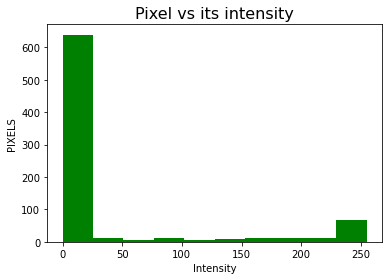

In [6]:
plt.hist(X_train[0].reshape(784),facecolor='green')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXELS')
plt.xlabel('Intensity')

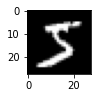

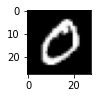

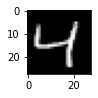

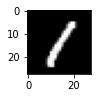

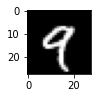

In [7]:
from matplotlib import pyplot
for i in range(5):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

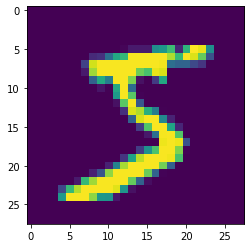

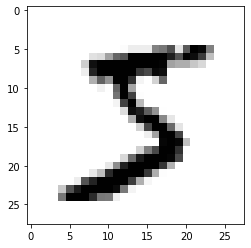

In [8]:
# Will plot the image
import matplotlib.pyplot as plt
plt.imshow(X_train[0])      # to show the image we want to use imshow
plt.show()               # In order to execute the graph
# however we don't know its color image or binary image 
## So inorder to plot it change the configuration

plt.imshow(X_train[0],cmap = plt.cm.binary)      # to convert colored image into gray scale image (black and white image) we are using cmap=plt.cm.binary

### Checking the Values of each pixel

### Before Normalization

In [9]:
print(X_train[0])       # Before Normalizing the data  0=black image and numbers =255 are white color but we used binary so it has made opposite 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

As image are in Gray level (1 channel = 0 to 255), not colored(RGB)
## Normalizing the data | Data Pre-Processing Steps

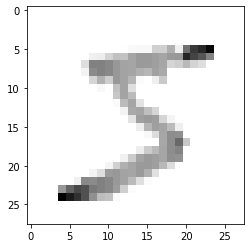

In [10]:
## You might have noticed that, its gray scale image and all values varies from 0 to 255 inorder to normilize it

X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)
plt.imshow(X_train[0],cmap=plt.cm.binary)

## After Normalization

In [11]:
print(X_train[0])   # You can see all values are normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
print(y_train[0])

5


## Resiziing image to make it suitable for apply Convolution Operation

In [13]:
import numpy as np
IMG_SIZE=28
X_trainr=np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)        # increasing one dimension for kernal operation
X_testr=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)          # increasing one dimension for kernal operation
print('Training Samples Dimension =',X_trainr.shape)
print('Testing Samples Dimension =',X_testr.shape)

Training Samples Dimension = (60000, 28, 28, 1)
Testing Samples Dimension = (10000, 28, 28, 1)


## Creating a Deep Neural Network

### Training on 60000 samples of MNIST handwritten dataset

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense,Dropout,Activation,Flatten,Conv2D, MaxPooling2D

In [15]:
### Creating a Nural Network
model = Sequential()              # Adding all the nural network Sequentialy

# First Convolution Layer 
model.add(Conv2D(64,(3,3),input_shape=X_trainr.shape[1:]))    # Only for first convolution layer to mention input layer size
model.add(Activation('relu'))    # activation function to make it non-linear, if the output is <0 it make it as 0 f(x)=max(y,0)
model.add(MaxPooling2D(pool_size=(2,2)))  # MaxPooling single Maximum value of 2*2

## 2nd Convolution Layer
model.add(Conv2D(64,(3,3)))    # 2nd convolution layer
model.add(Activation('relu'))    # activation function
model.add(MaxPooling2D(pool_size=(2,2)))   # Maxpooling

# 3rd Convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer 1
model.add(Flatten())    # Before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation('relu'))

## Fully connected layer 2
model.add(Dense(32))
model.add(Activation('relu'))

# last fully connected layer, output must be equal to number of classes,   10 (0-9)
model.add(Dense(10))      # this last dense layer must be equal to 10
model.add(Activation('softmax'))   # activation function is changed to softmax   (class probabilities)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [17]:
print('Total Trainings Samples =',len(X_trainr))

Total Trainings Samples = 60000


In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer ='adam',metrics =['accuracy'])

In [19]:
model.fit(X_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 48s 36ms/step - loss: 0.3242 - accuracy: 0.8970 - val_loss: 0.1429 - val_accuracy: 0.9564
Epoch 2/5
1313/1313 [==============================] - 48s 37ms/step - loss: 0.1070 - accuracy: 0.9671 - val_loss: 0.0856 - val_accuracy: 0.9737
Epoch 3/5
1313/1313 [==============================] - 52s 39ms/step - loss: 0.0775 - accuracy: 0.9762 - val_loss: 0.0727 - val_accuracy: 0.9777
Epoch 4/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0726 - val_accuracy: 0.9773
Epoch 5/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0651 - val_accuracy: 0.9798


In [20]:
# Evaluating on testing dataset 
test_loss,test_acc=model.evaluate(X_testr,y_test)
print('Test Loss on 10000 test samples',test_loss)
print('Validation Accuracy on 10000 test samples',test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0576 - accuracy: 0.9830
Test Loss on 10000 test samples 0.05759232118725777
Validation Accuracy on 10000 test samples 0.9829999804496765


In [21]:
predictions=model.predict([X_testr])

313/313 [==============================] - 3s 9ms/step


In [22]:
print(predictions)      # actually these predictions are based on one hot encoding so these are only arrays, containing softmax prediction

[[4.65931464e-07 5.72035015e-06 3.06971124e-05 ... 9.99846697e-01
  2.12062403e-07 3.62332003e-06]
 [1.05381063e-04 5.53800454e-08 9.99888301e-01 ... 1.32565890e-06
  4.04373941e-06 2.17863601e-07]
 [2.14504084e-07 9.99994755e-01 8.31332443e-07 ... 6.89309275e-07
  4.76482569e-07 1.23747509e-06]
 ...
 [4.58087075e-11 4.09244649e-07 3.16074361e-10 ... 4.05128077e-07
  1.56899787e-07 7.14499492e-07]
 [6.76347463e-06 3.93621917e-08 4.82354512e-09 ... 9.86882243e-10
  2.29857164e-03 7.71502329e-08]
 [1.33977819e-05 1.22859554e-08 2.06631398e-06 ... 6.51255994e-10
  1.26732775e-05 2.53569880e-07]]


In [23]:
## In order to understand, convert the predictions from one hot encoding, we need to use numpy for that
print(np.argmax(predictions[0]))     # So actually argmax will return the maximum value index and find the value of it

7


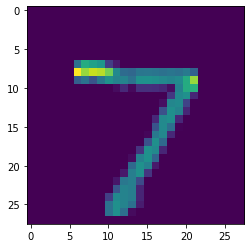

In [24]:
## now to check that is our answer is true or not

plt.imshow(X_test[0])

In [25]:
import cv2

In [26]:
img = cv2.imread("C:/Users/prade/Desktop/project/capstone projects/HAND WRITTING DIGITS PREDICTION USING MNIST/MNIST hand written digit classification/five.jpg")     # To load the image we use cv.imread

In [27]:
type(img)

numpy.ndarray

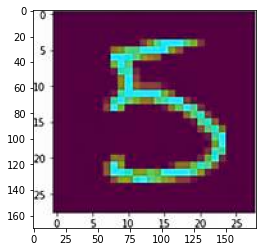

In [28]:
plt.imshow(img)

In [29]:
img.shape         # now i want to covert in to gray image 28*28

(170, 174, 3)

In [30]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [31]:
gray.shape

(170, 174)

In [32]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [33]:
resized.shape

(28, 28)

In [34]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [35]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)    # kernal operation of convertion layer

In [36]:
newimg.shape

(1, 28, 28, 1)

In [37]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 206ms/step


In [38]:
print(np.argmax(predictions))

5


In [39]:
lis=[np.nan,8,12,4,6]

# practice

In [66]:
img = cv2.imread("C:/Users/prade/Desktop/project/capstone projects/HAND WRITTING DIGITS PREDICTION USING MNIST/MNIST hand written digit classification/six.png")

In [67]:
type(img)

numpy.ndarray

ORIGINAL IMAGE:


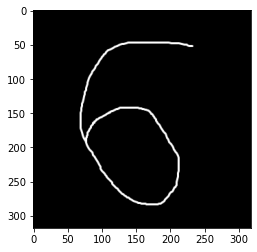

In [68]:
print('ORIGINAL IMAGE:')
plt.imshow(img)
plt.show()

In [69]:
img.shape         # now i want to covert in to gray image 28*28

(318, 318, 3)

In [70]:
norm=tf.keras.utils.normalize(img,axis=1)

AFTER CONVERTING TO GREYSCALE IMAGE:


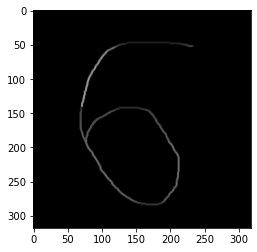

In [71]:
print('AFTER CONVERTING TO GREYSCALE IMAGE:',)
plt.imshow(norm,cmap = plt.cm.binary) 
plt.show()

In [72]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

AFTER CONVERTING TO GREYSCALE IMAGE:


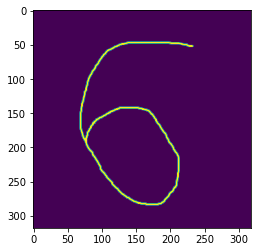

In [73]:
print('AFTER CONVERTING TO GREYSCALE IMAGE:',)
plt.imshow(gray)
plt.show()

In [74]:
gray.shape

(318, 318)

In [75]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

AFTER RESIZING:


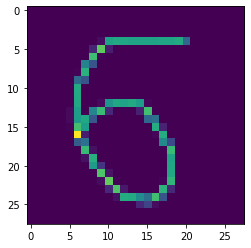

In [76]:
print('AFTER RESIZING:',)
plt.imshow(resized)
plt.show()

In [77]:
resized.shape

(28, 28)

In [78]:
newimg=tf.keras.utils.normalize(resized,axis=1)

FINAL OUTPUT: 6


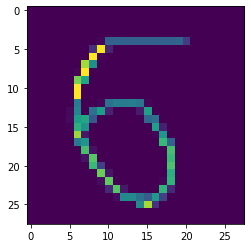

In [79]:
print('FINAL OUTPUT:',np.argmax(predictions))
plt.imshow(newimg)
plt.show()

In [80]:
print('Final output:',np.argmax(predictions))

Final output: 6


In [81]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)    # kernal operation of convertion layer

In [82]:
newimg

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [83]:
newimg.shape

(1, 28, 28, 1)

In [84]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 29ms/step


In [85]:
predictions

array([[2.3077957e-04, 6.8114059e-10, 3.0657500e-08, 1.6773422e-06,
        1.4495164e-09, 2.1380985e-04, 9.9885023e-01, 3.0464912e-11,
        7.0348155e-04, 3.6197207e-09]], dtype=float32)

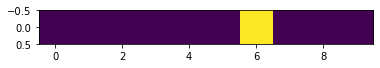

In [86]:
plt.imshow(predictions)

In [87]:
print('Final output:',np.argmax(predictions))

Final output: 6
